In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Exploratory Data Analysis**

In [6]:
df = pd.read_csv('https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
df.head()
df.columns = df.columns.str.strip()
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

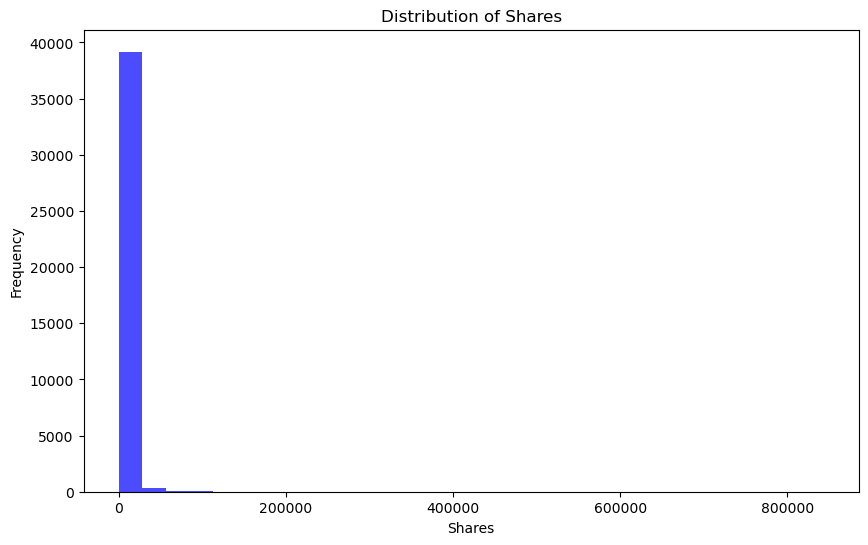

In [7]:
#1 plot the distribution of the target variable
plt.figure(figsize=(10,6))
plt.hist(df['shares'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

Since our histogram is showing the distribution of shares to be heavily skewed to the right, a log transformation on the target variable seems appropriate.

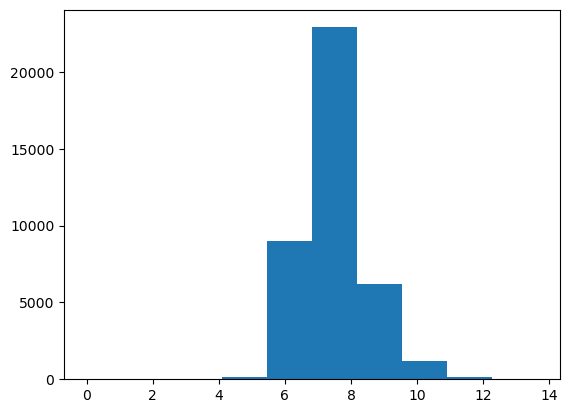

In [8]:
#1 performing a log transformation on the target variable
plt.hist(np.log(df['shares']))
plt.show()

df["log_shares"] = np.log(df['shares'])

In [9]:
#2 build a linear regression model w/o higher order
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


X = df.drop(columns=["shares","log_shares", "url", "timedelta"])

# Dummify
X = pd.get_dummies(X,drop_first = True)
y = df["log_shares"]

# split into train/test groups
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size=0.2, random_state=1234)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train_lin)
X_train_scaled = scaler.transform(X_train_lin)

scale_y = StandardScaler()
scale_y.fit(y_train_lin.values.reshape(-1,1))
y_train_scaled = scale_y.transform(y_train_lin.values.reshape(-1,1))

# Fit a linear regression model
reg_prep = LinearRegression()
mod_reg = reg_prep.fit(X_train_scaled,y_train_scaled)
# print(mod_reg.coef_)

#examining p-values
X_train_with_const = sm.add_constant(X_train_scaled)
X_train_with_const_df = pd.DataFrame(
    X_train_with_const, 
    columns=['const'] + list(X.columns)
)
model = sm.OLS(y_train_scaled, X_train_with_const_df).fit()
print(model.summary())

p_values = pd.DataFrame({
    'feature': X_train_with_const_df.columns,
    'p_value': model.pvalues
})

significant_features_sorted = p_values.sort_values('p_value')
top_10_significant = significant_features_sorted.head(10)

print("Top 10 most significant features:", top_10_significant)

significant_features = p_values[p_values['p_value'] < 0.05]
print("\n\n\nsignificant features with a p-value < .05", significant_features)




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     83.15
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:51:36   Log-Likelihood:                -42826.
No. Observations:               31715   AIC:                         8.577e+04
Df Residuals:                   31658   BIC:                         8.624e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [10]:
#r^2 for the regression model
from sklearn.metrics import mean_squared_error, r2_score
X_test_scaled = scaler.transform(X_test_lin)
preds = scale_y.inverse_transform(mod_reg.predict(X_test_scaled))
print("Out of Sample R^2: ",r2_score(y_test_lin,preds))

in_preds = scale_y.inverse_transform(mod_reg.predict(X_train_scaled))
print("In Sample R^2: ",r2_score(y_train_lin,in_preds))

Out of Sample R^2:  0.11906891264936392
In Sample R^2:  0.12832014414497328


[Text(0.5, 0.9166666666666666, 'kw_avg_avg <= 3085.189\nsquared_error = 0.868\nsamples = 31715\nvalue = 7.474'),
 Text(0.25, 0.75, 'self_reference_avg_sharess <= 1995.75\nsquared_error = 0.674\nsamples = 18796\nvalue = 7.295'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'kw_max_max <= 654150.0\nsquared_error = 0.632\nsamples = 9894\nvalue = 7.17'),
 Text(0.0625, 0.4166666666666667, 'kw_max_avg <= 2960.399\nsquared_error = 0.679\nsamples = 2042\nvalue = 7.389'),
 Text(0.03125, 0.25, 'n_tokens_content <= 158.5\nsquared_error = 0.588\nsamples = 611\nvalue = 7.168'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 0.831\nsamples = 65\nvalue = 7.599'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 0.534\nsamples = 546\nvalue = 7.116'),
 Text(0.09375, 0.25, 'weekday_is_saturday <= 0.5\nsquared_error = 0.688\nsamples = 1431\nvalue = 7.483'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 0.673\nsamples = 1354\nvalue = 7.453'),
 Text(0.109

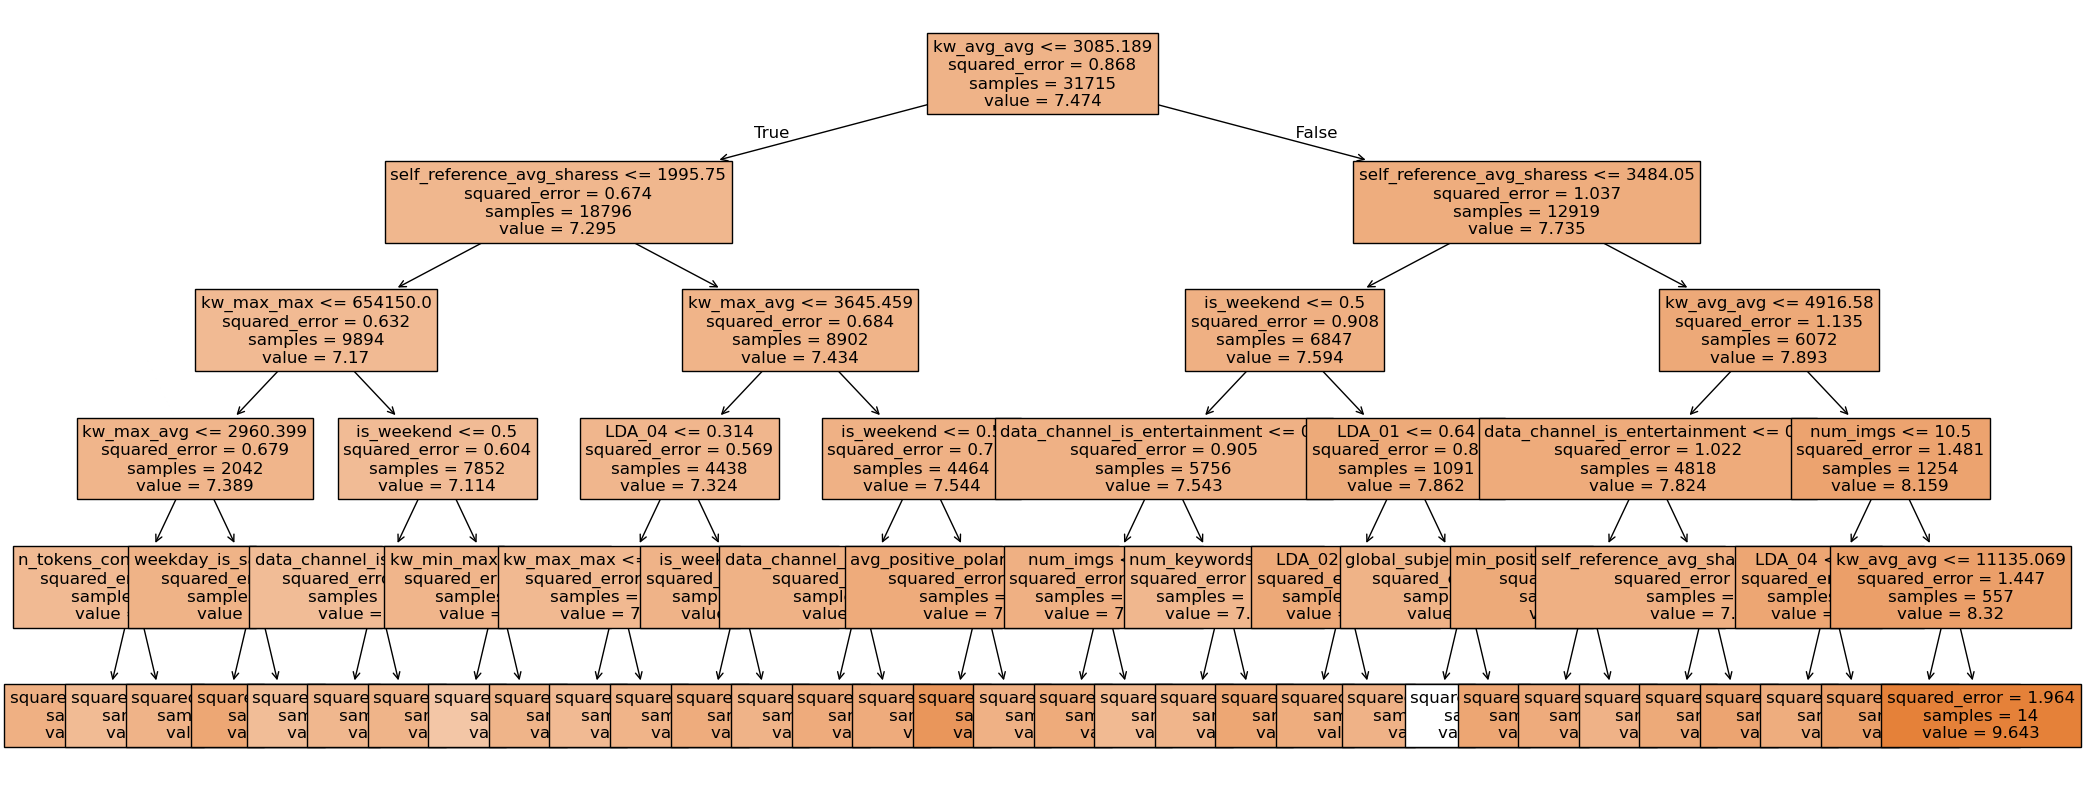

In [11]:
#3 build a regression tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


predictors = df.drop(columns=["shares","log_shares", "url", "timedelta"])

# Dummify
X = pd.get_dummies(predictors,drop_first = True)
y = df["log_shares"]

# split into train/test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

tree_prep = DecisionTreeRegressor(max_depth=5)
mod_tree = tree_prep.fit(X_train,y_train)
plt.figure(figsize = (25,10))
tree.plot_tree(mod_tree, feature_names=X.columns, filled = True,fontsize = 12)

In [12]:
#compare R squared
in_preds = mod_tree.predict(X_train)
in_sample = r2_score(y_train,in_preds)
print("in sample", in_sample)
preds = mod_tree.predict(X_test)
print("out of sample", r2_score(y_test,preds))


in sample 0.12416122405339514
out of sample 0.10403882272223264


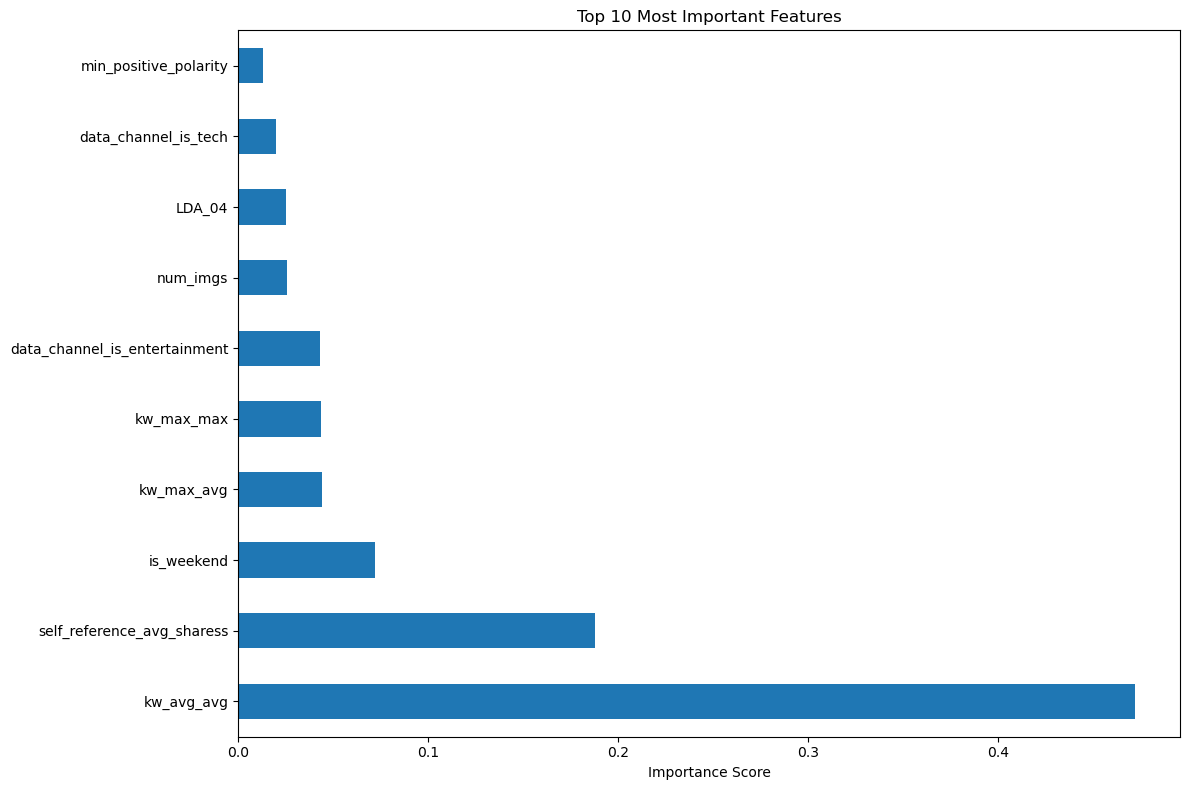


Top 10 Features by Importance:
                         Feature  Importance
0                     kw_avg_avg    0.472056
1     self_reference_avg_sharess    0.187697
2                     is_weekend    0.072200
3                     kw_max_avg    0.044079
4                     kw_max_max    0.043578
5  data_channel_is_entertainment    0.043011
6                       num_imgs    0.025721
7                         LDA_04    0.024912
8           data_channel_is_tech    0.020112
9          min_positive_polarity    0.013079


In [13]:
# Create figure
plt.figure(figsize=(12, 8))

# Create and store feature importances Series first
feature_importances = pd.Series(mod_tree.feature_importances_, index=X.columns)

# Sort and get top 10 features
top_10_features_tree = feature_importances.sort_values(ascending=False).head(10)

# Create table
feature_importance_table_tree = pd.DataFrame({
    'Feature': top_10_features_tree.index,
    'Importance': top_10_features_tree.values
})

# Plot
top_10_features_tree.plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Print table
print("\nTop 10 Features by Importance:")
print(feature_importance_table_tree)

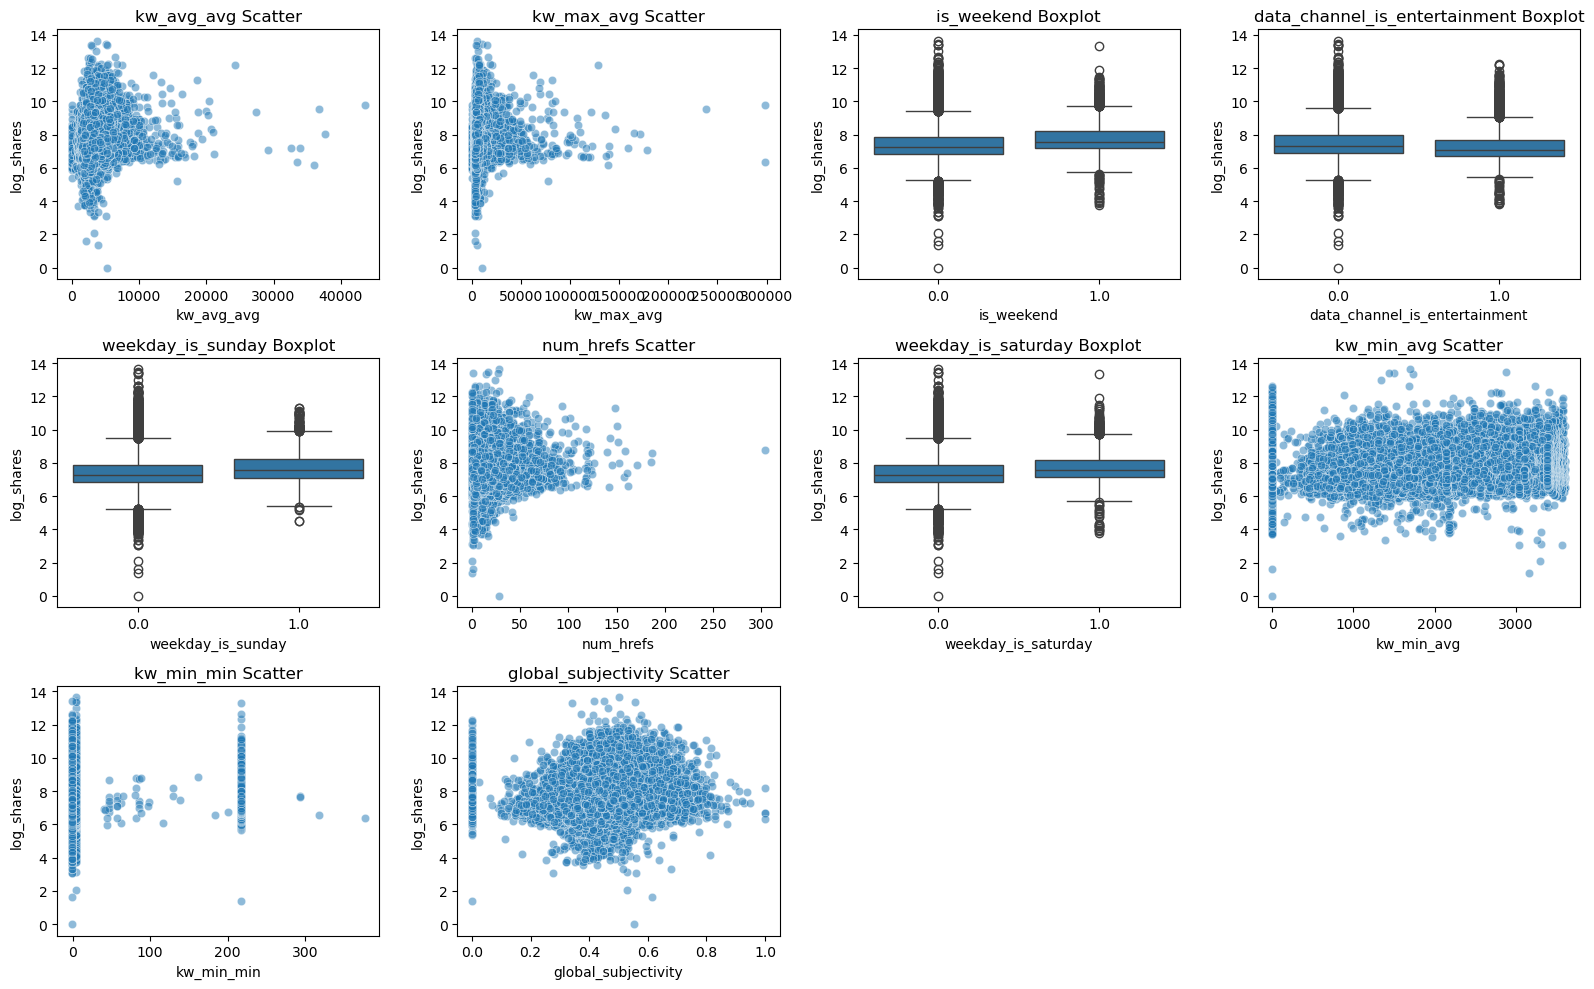

In [14]:
#4 select several significant features. create visualizations or tables to explore the relationships between features and target variable.
features = ['kw_avg_avg', 'kw_max_avg', 'is_weekend', 'data_channel_is_entertainment', 'weekday_is_sunday', 'num_hrefs', 'weekday_is_saturday', 'kw_min_avg', 'kw_min_min', 'global_subjectivity']
plt.figure(figsize=(16,10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    # binary
    if df[feature].nunique() <= 2:
        sns.boxplot(x=feature, y='log_shares', data=df)
        plt.title(f'{feature} Boxplot')
    #continuous
    else:
        sns.scatterplot(x=feature, y='log_shares', data=df, alpha=0.5)
        plt.title(f'{feature} Scatter')
plt.tight_layout()
plt.show()

In [15]:
#6 use appropriate methods to remove insignificant variable froms the model.

#removed all predictors with p-values > 0.05
mod_temp = model
X_train_temp = X_train_with_const_df

while max(mod_temp.pvalues[1:]) > 0.05 and (len(X_train_temp.columns) > 1):
  max_pvalue = np.argmax(mod_temp.pvalues[1:])+1
  X_train_temp = X_train_temp.drop(columns = X_train_temp.columns[max_pvalue])
  mod_temp = sm.OLS(y_train_scaled,X_train_temp).fit()

mod_reduced = mod_temp
mod_temp.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:51:49   Log-Likelihood:                -42834.
No. Observations:               31715   AIC:                         8.575e+04
Df Residuals:                   31676   BIC:                         8.607e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -4.774e-16      0.005   -9.1e-14      1.000      -0.010       0.010
n_tokens_title                    0.0110      0.005      2.016      0.044       0.000       0.022
n_tokens_content                  0.0215      0.007      3.240      0.001       0.009       0.035
n_non_stop_words                  0.0116      0.005      2.198      0.028       0.001       0.022
num_hrefs                         0.0563      0.007      8.377      0.000       0.043       0.070
num_self_hrefs                   -0.0320      0.006     -5.259      0.000      -0.044      -0.020
num_imgs                          0.0257      0.006      4.185      0.000       0.014       0.038
average_token_length             -0.0715      0.009     -7.930      0.000      -0.089      -0.054
num_keywords                      0.0244      0.006      3.848      0.000       0.012       0.037
data_channel_is_lifestyle        -0.0199      0.007     -2.934      0.003      -0.033      -0.007
data_channel_is_entertainment    -0.0651      0.008     -8.379      0.000      -0.080      -0.050
data_channel_is_bus              -0.0578      0.010     -5.524      0.000      -0.078      -0.037
data_channel_is_socmed            0.0453      0.007      6.956      0.000       0.032       0.058
data_channel_is_tech              0.0597      0.010      5.982      0.000       0.040       0.079
kw_min_min                        0.0611      0.007      9.044      0.000       0.048       0.074
kw_max_min                        0.0696      0.017      4.046      0.000       0.036       0.103
kw_avg_min                       -0.0895      0.017     -5.280      0.000      -0.123      -0.056
kw_min_max                       -0.0145      0.006     -2.371      0.018      -0.026      -0.003
kw_avg_max                       -0.0504      0.009     -5.335      0.000      -0.069      -0.032
kw_min_avg                       -0.0601      0.008     -7.708      0.000      -0.075      -0.045
kw_max_avg                       -0.2780      0.014    -20.001      0.000      -0.305      -0.251
kw_avg_avg                        0.4792      0.017     28.175      0.000       0.446       0.513
self_reference_avg_sharess        0.0473      0.005      8.789      0.000       0.037       0.058
weekday_is_monday                 0.0238      0.005      4.349      0.000       0.013       0.035
weekday_is_friday                 0.0251      0.005      4.603      0.000       0.014       0.036
weekday_is_saturday               0.0755      0.005     14.008      0.000       0.065       0.086
weekday_is_sunday                 0.0776      0.005     14.327      0.000       0.067       0.088
LDA_00                            0.1407      0.011     12.552      0.000       0.119       0.163
LDA_01                            0.0289     

**Technical Report**

EDA SECTION

- We performed a log transformation on the target variable shares to make it less skewed. Binary features were examined using boxplots to explore their relationship with log_shares and scatterplots were used to explore the relationship between continuous features and log_shares.

- Results: 
    - The out of sample R^2 for our linear regression model was: 0.11908732172009107
    - The out of sample R^2 for our regression tree was: 0.1040388227222323
    A higher R^2 suggests that the model is better at predicting the target variable. From our results, our initial linear regression model was slightly better than our regression tree model at predicting the target variable of log_shares although the models were comparable.

    - Below is a table with the 10 most significant features from our linear regression model (features with p-vaues less than .05) and the 10 features of most importance from our intial regression tree model.
    - The features that we noticed the same for both include: kw_avg_avg, kw_max_avg, is_weekend and data_channel_is_entertainment.





In [16]:
print("Top 10 most significant features in initial linear regression model:", top_10_significant)

print("\nTop 10 Features by Importance:")
print(feature_importance_table_tree)

Top 10 most significant features in initial linear regression model:                                                      feature        p_value
kw_avg_avg                                        kw_avg_avg  6.934242e-164
kw_max_avg                                        kw_max_avg   3.713862e-84
data_channel_is_entertainment  data_channel_is_entertainment   7.972731e-16
num_hrefs                                          num_hrefs   1.385766e-14
kw_min_avg                                        kw_min_avg   3.290540e-14
kw_min_min                                        kw_min_min   2.292004e-10
global_subjectivity                      global_subjectivity   3.017029e-10
average_token_length                    average_token_length   4.584560e-08
kw_avg_max                                        kw_avg_max   1.129232e-07
kw_avg_min                                        kw_avg_min   1.536408e-07

Top 10 Features by Importance:
                         Feature  Importance
0                 

## Part 2: Linear Regression Modeling

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures

In [90]:
# train test split with log transform

df = pd.read_csv('https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
df.columns = df.columns.str.strip()
df['log_shares'] = np.log(df['shares'])

features_to_keep = [
    'kw_avg_avg',
    'self_reference_avg_sharess',
    'is_weekend',
    'kw_max_avg',
    'kw_max_max',
    'data_channel_is_entertainment',
    'num_imgs',
    'LDA_04',
    'data_channel_is_tech',
    'min_positive_polarity',
    'weekday_is_sunday',
    'num_hrefs',
    'weekday_is_saturday',
]

X = df[features_to_keep]
X = pd.get_dummies(X,drop_first = True)
y = df["log_shares"]


In [85]:
# inital model test
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Out of Sample R^2: ",r2_score(y_test,lr.predict(X_test)))

Out of Sample R^2:  0.10579114388696498


In [91]:
# higher order and transforms

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# higher order
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

feature_names = poly.get_feature_names_out(X.columns)
X_poly = pd.DataFrame(X_poly, columns=feature_names)

# log transform on right-skewed features
X_poly['log_kw_avg_avg'] = np.log1p(X['kw_avg_avg'])
X_poly['log_num_hrefs'] = np.log1p(X['num_hrefs'])

In [95]:
def stepwise_feature_selection(X_train, X_test, y_train):
    features_to_remove = []
    features_kept = []
    
    while True:
        mod_temp = sm.OLS(y_train, sm.add_constant(X_train)).fit()
        
        p_values = mod_temp.pvalues[1:]  # Exclude constant term
        max_p_value = p_values.max()
        max_p_feature = p_values.idxmax()
        
        if max_p_value > 0.05:
            # Remove least significant feature
            features_to_remove.append(max_p_feature)
            X_train = X_train.drop(columns=[max_p_feature])
            X_test = X_test.drop(columns=[max_p_feature])
        else:
            # Keep all remaining features
            features_kept.extend(X_train.columns.tolist())
            break
    
    # Final model with all kept features
    final_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    
    # Predictions
    preds = final_model.predict(sm.add_constant(X_test))
    out_of_sample_r2 = r2_score(y_test, preds)
    
    return features_kept, out_of_sample_r2


def lasso_feature_selection(X_train, X_test, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit LassoCV
    lasso_cv = LassoCV(cv=5, random_state=42)
    lasso_cv.fit(X_train_scaled, y_train)

    # Get selected features
    selected_features = X_train.columns[lasso_cv.coef_ != 0].tolist()
    #print("\nSelected features by LASSO:")
    #print(selected_features)
    #print(f"\nBest alpha: {lasso_cv.alpha_:.4f}")

    r2 = r2_score(y_test, lasso_cv.predict(X_test_scaled))

    return selected_features, lasso_cv.alpha_, r2

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
features_kept, out_of_sample_r2 = stepwise_feature_selection(X_train, X_test, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
selected_features, lasso_alpha, r2 = lasso_feature_selection(X_train, X_test, y_train)

/Users/nkroberts/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4822218171211716, tolerance: 2.1851969489686933
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nkroberts/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5142428464350814, tolerance: 2.1851969489686933
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nkroberts/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5080108985675906, tolerance: 2.1851969489686933
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nkroberts/opt/anaconda3/lib/py

In [99]:
set_sw = set(features_kept)
set_l = set(selected_features)
print("# of features selected by stepwise:", len(features_kept))
print("# of features selected by LASSO:", len(selected_features))
print("# of features in intersection:", len(set_sw & set_l))
print("Features unique to stepwise feature selection:", set_sw - set_l)
print("Features unique to LASSO:", set_l - set_sw)
print("Intersection:", set_sw & set_l)
print("Stepwise R^2:", out_of_sample_r2)
print("LASSO R^2:", r2)
print("LASSO alpha:", lasso_alpha)

# of features selected by stepwise: 41
# of features selected by LASSO: 73
# of features in intersation: 33
Features unique to stepwise feature selection: {'data_channel_is_entertainment data_channel_is_tech', 'kw_avg_avg weekday_is_saturday', 'data_channel_is_entertainment weekday_is_saturday', 'kw_avg_avg kw_max_avg', '1', 'is_weekend kw_max_max', 'kw_max_avg weekday_is_saturday', 'kw_avg_avg weekday_is_sunday'}
Features unique to LASSO: {'kw_avg_avg data_channel_is_tech', 'kw_avg_avg LDA_04', 'num_imgs^2', 'kw_max_max data_channel_is_entertainment', 'is_weekend num_imgs', 'LDA_04 weekday_is_saturday', 'num_hrefs weekday_is_saturday', 'data_channel_is_tech min_positive_polarity', 'kw_max_max weekday_is_saturday', 'min_positive_polarity num_hrefs', 'weekday_is_saturday', 'kw_max_max LDA_04', 'is_weekend data_channel_is_entertainment', 'kw_max_max min_positive_polarity', 'kw_max_avg data_channel_is_tech', 'log_num_hrefs', 'is_weekend kw_max_avg', 'is_weekend', 'LDA_04 weekday_is_sunday

- We chose to put a log transform on kw_avg_avg and num_hrefs due to skewness. We started the implementation for this section with a subset of the features, using primarily the features that were found to be significant in the previous sections so that we could test higher order features on all of them without needing too much compute time. 
- Our stepwise implementation select 41 features and LASSO select 73 features. The intersection of both methods is 33, implying that there was a decent amount of overlap in which features were selected. Both methods performed similarly, with the stepwise model slightly outperforming the LASSO model. The LASSO implementation had a very small alpha value of .001, implying that not much regularization was needed.
- Looking at the specific features selected, both methods identified interaction terms and squared terms as important predictors, particularly those involving num_hrefs, num_imgs, and self_reference_avg_sharess. This implies that the relationships between these variables is not just linear. Neither model performed exceptionally well, implying that there are influences that are not captured by our set of predictors.

## Part 3: Regression Trees

In [30]:
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Assuming X_train, y_train, X_test, y_test are already defined.

print("Splitting the data for pruning path computation...")
X_small, _, y_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Step 2: Compute pruning path
print("Computing the cost complexity pruning path...")
path = DecisionTreeRegressor(random_state=42).cost_complexity_pruning_path(X_small, y_small)
ccp_alphas = path.ccp_alphas
print(f"Computed {len(ccp_alphas)} ccp_alpha values.")

# Step 3: Subsample alphas
print("Subsampling ccp_alpha values...")
ccp_alphas_subset = ccp_alphas[::100]
print(f"Selected {len(ccp_alphas_subset)} ccp_alpha values for grid search.")

# Step 4: GridSearch for best alpha
print("Starting GridSearchCV for optimal ccp_alpha...")
param_grid = {'ccp_alpha': ccp_alphas_subset}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
)

# Using tqdm to track the fitting process
with tqdm(total=1, desc="GridSearchCV Progress") as pbar:
    grid_search.fit(X_train, y_train)
    pbar.update(1)

# Get the best ccp_alpha
best_alpha = grid_search.best_params_['ccp_alpha']
print(f"Best ccp_alpha: {best_alpha}")

# Step 5: Train the final model
print("Training the final DecisionTreeRegressor with the best ccp_alpha...")
final_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
final_model.fit(X_train, y_train)

# Evaluate the final model
print("Evaluating the final model...")
y_final_pred = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_final_pred))
print(f"Final Model RMSE: {final_rmse}")


Splitting the data for pruning path computation...
Computing the cost complexity pruning path...
Computed 2788 ccp_alpha values.
Subsampling ccp_alpha values...
Selected 28 ccp_alpha values for grid search.
Starting GridSearchCV for optimal ccp_alpha...


GridSearchCV Progress: 100%|██████████| 1/1 [05:33<00:00, 333.31s/it]


Best ccp_alpha: 0.0016060584502563535
Training the final DecisionTreeRegressor with the best ccp_alpha...
Evaluating the final model...
Final Model RMSE: 0.8777455992836293


In [31]:
y_final_pred = final_model.predict(X_test)
final_r2 = r2_score(y_test, y_final_pred)
print(f"Best Model OOS R^2: {final_r2}")

Best Model OOS R^2: 0.0991812734616897


In [34]:
# 3

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Identify the best ccp_alpha for individual trees using a single tree
single_tree = DecisionTreeRegressor(random_state=42)
path = single_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

alphas_subset = ccp_alphas[::1000]
print(len(alphas_subset))

# Cross-validation to find the best ccp_alpha
alpha_scores = []

for alpha in alphas_subset:
    print(alpha)
    pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(pruned_tree, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    alpha_scores.append(np.mean(scores))

# Select the best alpha
best_ccp_alpha = ccp_alphas[np.argmax(alpha_scores)]
print(f"Best ccp_alpha for individual trees: {best_ccp_alpha}")

rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=100,
    max_features='sqrt',
    ccp_alpha=best_ccp_alpha 
)

rf_model.fit(X_train, y_train)

# Step 3: Evaluate the Random Forest model
y_rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
print(f"Random Forest RMSE with Pruned Trees: {rf_rmse}")
rf_r2 = r2_score(y_test, y_rf_pred)
print(f"Random Forest OOS R^2: {rf_r2}")


28
0.0
7.550453932723964e-10
7.626963725868225e-09
2.2455184553183418e-08
4.1584615184477103e-08
6.566641511681831e-08
9.776327745433418e-08
1.3059391400251777e-07
1.7971623169715487e-07
2.576284230073958e-07
3.580788140760125e-07
4.877428117433783e-07
6.64836227917162e-07
9.022677617932177e-07
1.222536920450528e-06
1.7091338733356974e-06
2.3232541708187876e-06
3.208906644606751e-06
4.399049051577107e-06
6.021571369409544e-06
8.47787850314397e-06
1.1637593265725988e-05
1.651210879073282e-05
2.332017746139143e-05
3.4272618217039355e-05
5.20775784465328e-05
8.64210599888785e-05
0.00016474660695842656
Best ccp_alpha for individual trees: 4.480799216522782e-19
Random Forest RMSE with Pruned Trees: 0.8493670950513869
Random Forest OOS R^2: 0.1564886149321294


The single regression tree with cost-complexity pruning was one of the worse models we found. It had an out of sample R^2 of .099. However, the random fores with cost-complexity pruning ended up being our very best model with an out of sample R^2 of .156. The random forest is the model that we would recommend for Mashable's business. 